#### 각 조별로 수집한 데이터(csv)
#### 다양한 방법으로 시각화
#### 데이터 탐색! 의미 해석 결과 도출!
#### 도출한 코드 공유!

## 은평구 BBQ 지점들 카테고리별 투표 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./은평구지점(김현규).csv', encoding='CP949') # csv파일 호출

df.set_index('매장 이름', inplace=True) # 인덱스 설정
df

,음식이 맛있어요,친절해요,매장이 넓어요,매장이 청결해요,단체모임 하기 좋아요,총 투표 수
매장 이름,,,,,,
BBQ치킨 녹번중앙점,35.8,19.8,0.6,6.2,1.2,162
BBQ치킨 은평갈현로점,41.1,26.8,0.0,7.1,0.0,56
BBQ치킨 역촌점,38.6,20.2,0.0,5.3,1.8,114
BBQ치킨 은평진관점,35.3,18.8,1.2,5.9,2.4,85
BBQ치킨 녹번점,41.7,16.6,2.0,2.0,0.0,151
BBQ치킨 불광1동점,52.0,14.7,0.0,2.7,0.0,75
BBQ치킨 연신내점,50.6,14.1,0.0,4.7,2.4,85
BBQ치킨 은평대조점,40.4,19.1,0.0,6.4,2.1,94
BBQ치킨 응암역점,33.8,20.8,5.4,7.7,3.1,130


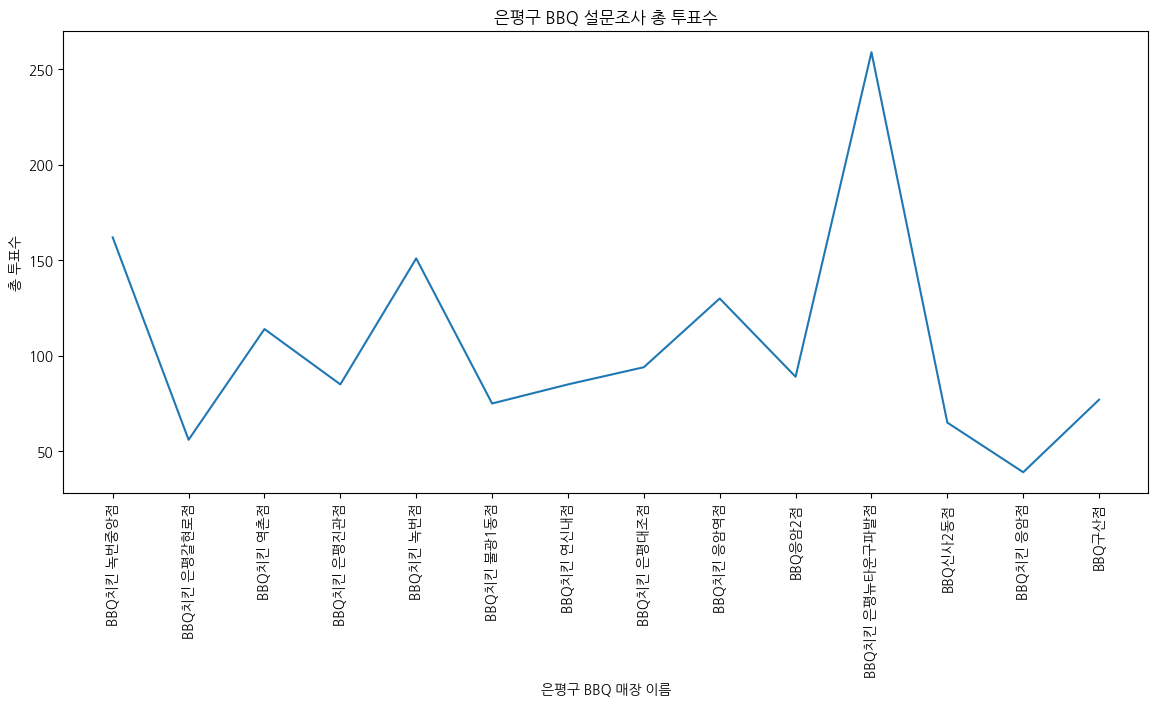

In [2]:
from matplotlib import rc
plt.rc('font', family='NanumGothic') # 그래프 한글 변환
# 지점별 총 투표수 bar로 나타내기
df_vote=df[['총 투표 수']]


plt.figure(figsize=(14, 6))
plt.plot(df_vote.index, df_vote.values)
plt.title('은평구 BBQ 설문조사 총 투표수')
plt.ylabel('총 투표수')
plt.xlabel('은평구 BBQ 매장 이름')
plt.xticks(rotation='vertical')
plt.show()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
# 카테고리별로 정렬 및 새 인덱스(기타) 추가
df_trans = df.T
df_trans.drop('총 투표 수', inplace=True)
etc=[]
for column in df_trans.columns:
    etc.append((100-df_trans[[f'{column}']].sum()[0]).round(1))
df_trans.loc['기타'] = etc
df_trans

매장 이름,BBQ치킨 녹번중앙점,BBQ치킨 은평갈현로점,BBQ치킨 역촌점,BBQ치킨 은평진관점,BBQ치킨 녹번점,BBQ치킨 불광1동점,BBQ치킨 연신내점,BBQ치킨 은평대조점,BBQ치킨 응암역점,BBQ응암2점,BBQ치킨 은평뉴타운구파발점,BBQ신사2동점,BBQ치킨 응암점,BBQ구산점
음식이 맛있어요,35.8,41.1,38.6,35.3,41.7,52.0,50.6,40.4,33.8,37.1,42.5,49.2,61.5,61.0
친절해요,19.8,26.8,20.2,18.8,16.6,14.7,14.1,19.1,20.8,22.5,10.4,24.6,12.8,11.7
매장이 넓어요,0.6,0.0,0.0,1.2,2.0,0.0,0.0,0.0,5.4,2.2,5.4,0.0,0.0,0.0
매장이 청결해요,6.2,7.1,5.3,5.9,2.0,2.7,4.7,6.4,7.7,1.1,2.7,1.5,2.6,1.3
단체모임 하기 좋아요,1.2,0.0,1.8,2.4,0.0,0.0,2.4,2.1,3.1,1.1,3.1,0.0,0.0,0.0
기타,36.4,25.0,34.1,36.4,37.7,30.6,28.2,32.0,29.2,36.0,35.9,24.7,23.1,26.0


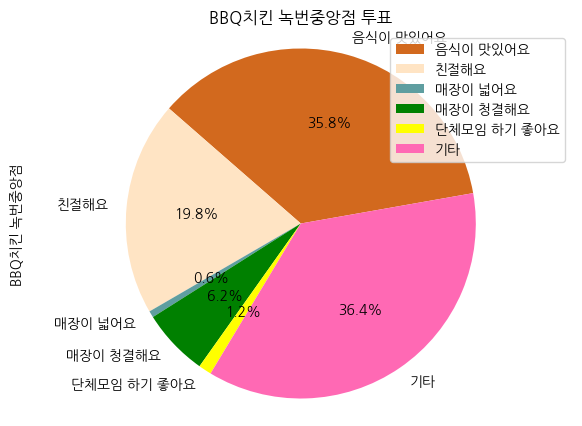

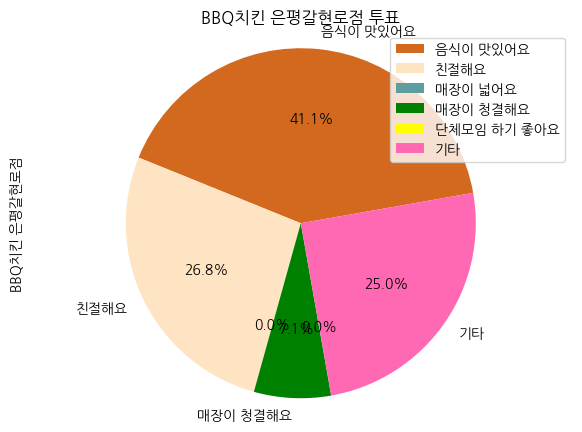

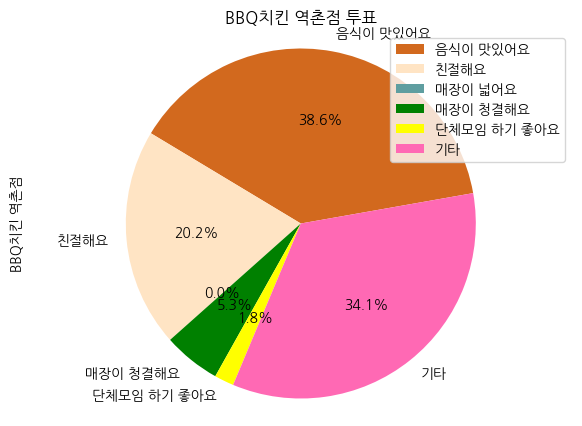

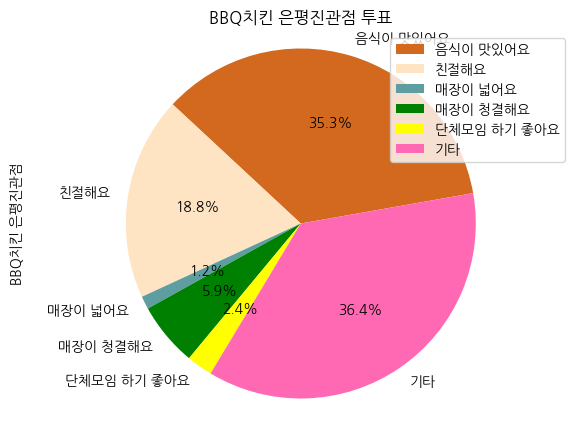

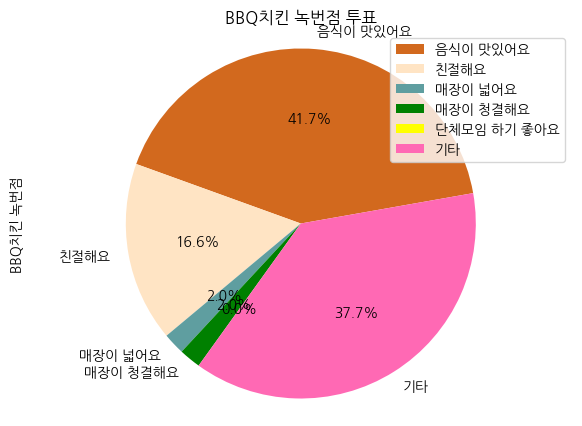

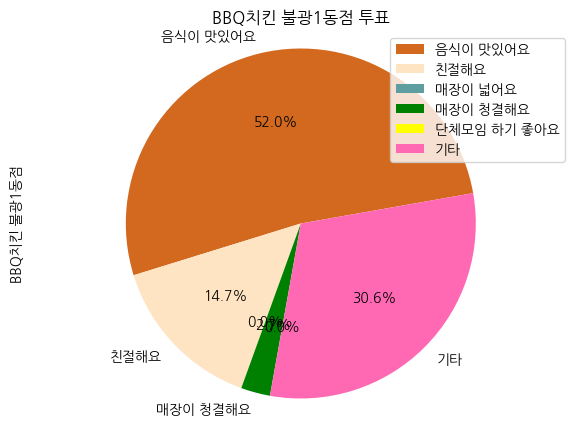

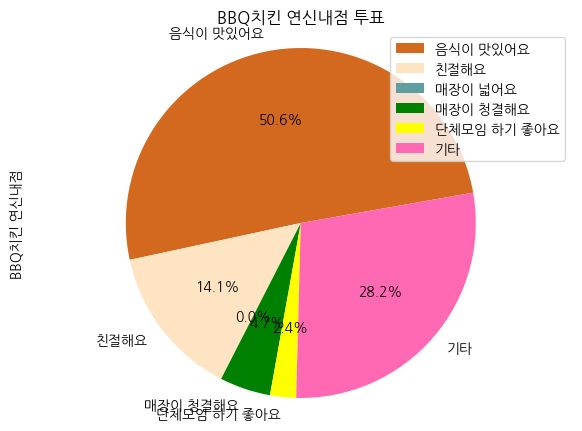

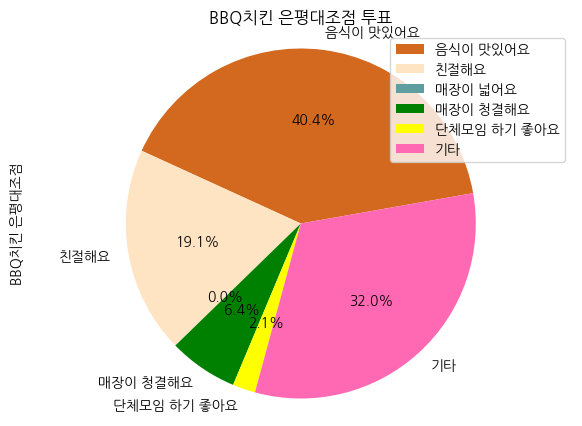

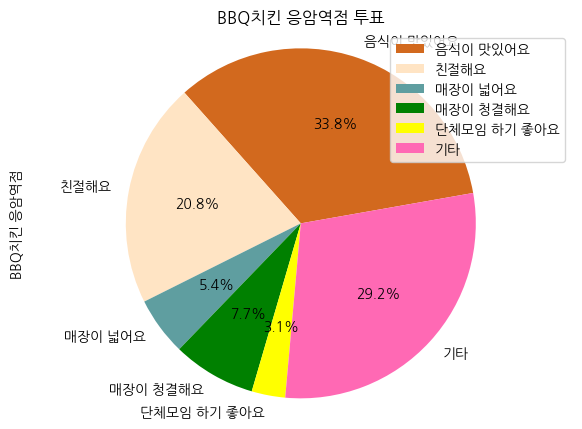

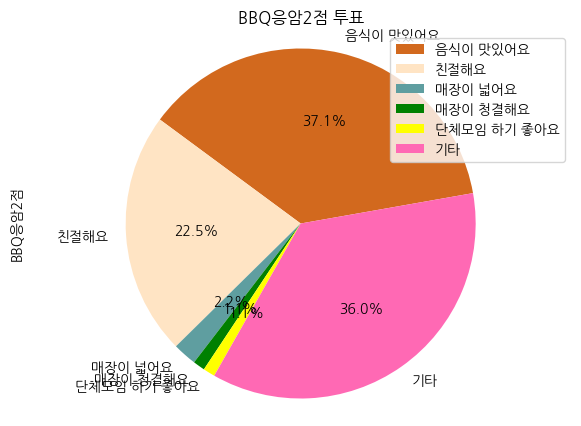

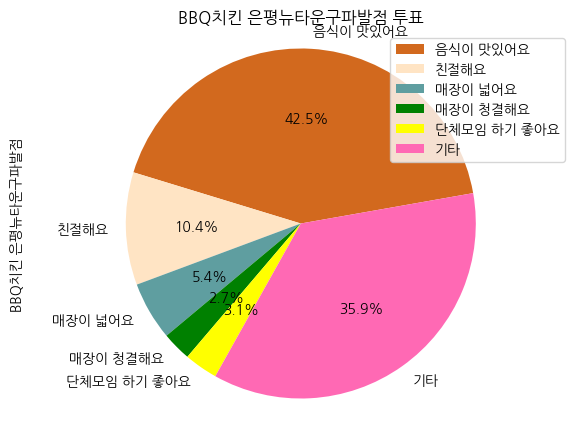

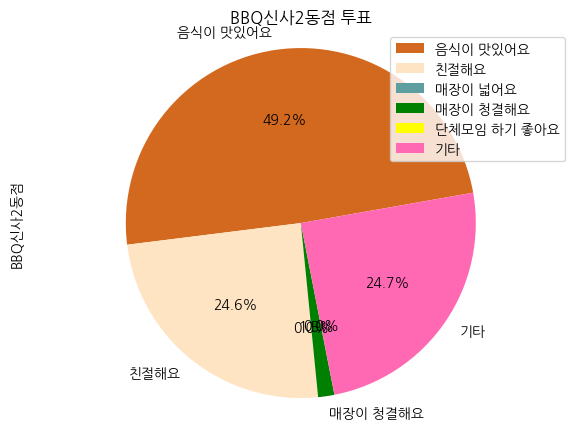

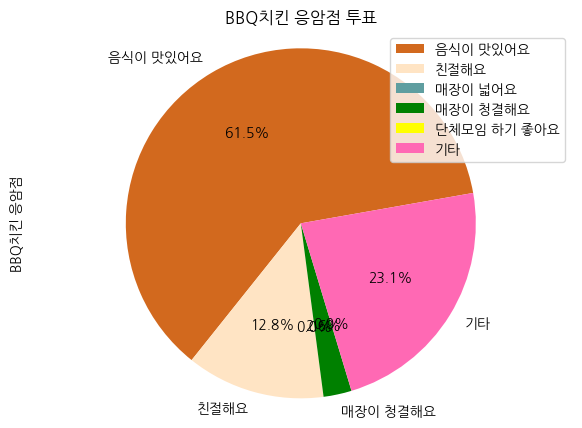

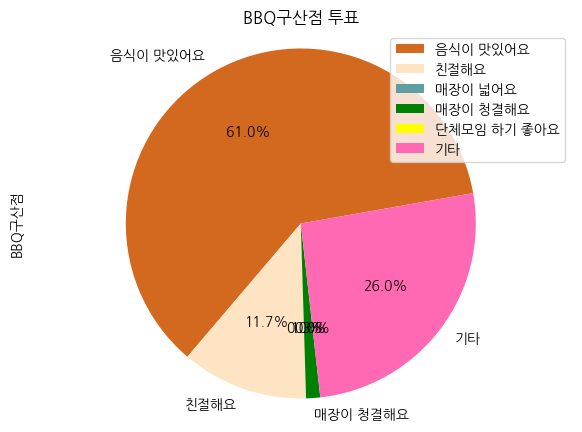

In [4]:
from matplotlib import rc
plt.rc('font', family='NanumGothic')

# 지점별로 5가지 카테고리별 및 나머지(기타) 파이로 만들기
def make_pie(store):
    df_trans[store].plot(kind='pie',
                                 figsize=(7,5),
                                 autopct='%1.1f%%',
                                 startangle=10,
                                 colors = ['chocolate', 'bisque', 'cadetblue', 'green', 'yellow','hotpink']
                                )
    plt.title(f'{store} 투표')
    plt.axis('equal')
    plt.legend(labels=df_trans.index, loc='upper right')
    plt.show()
for store in df_trans.columns:
    make_pie(store)

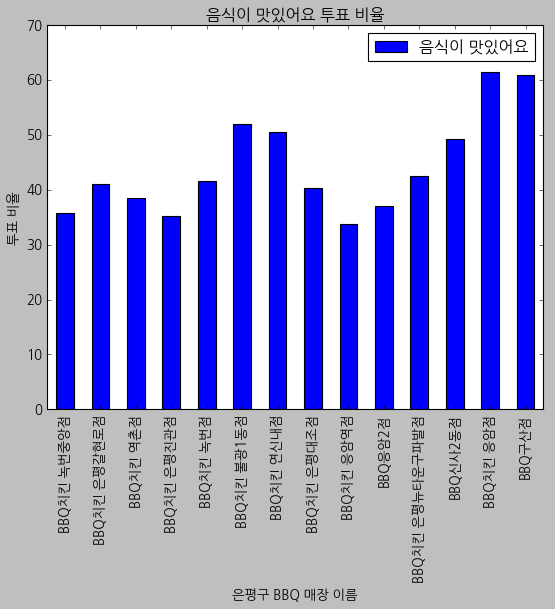

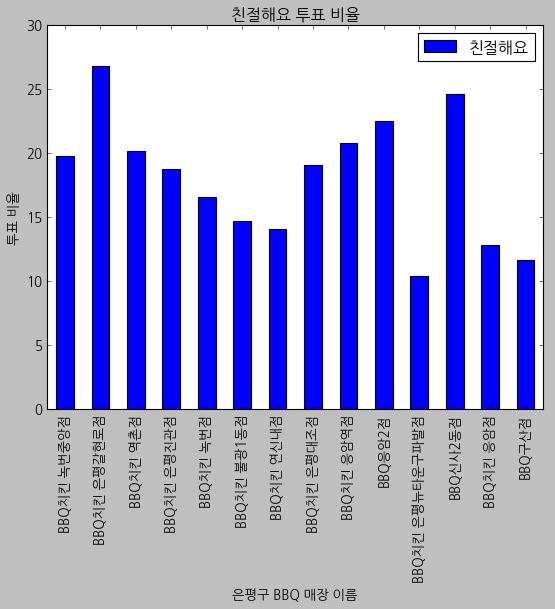

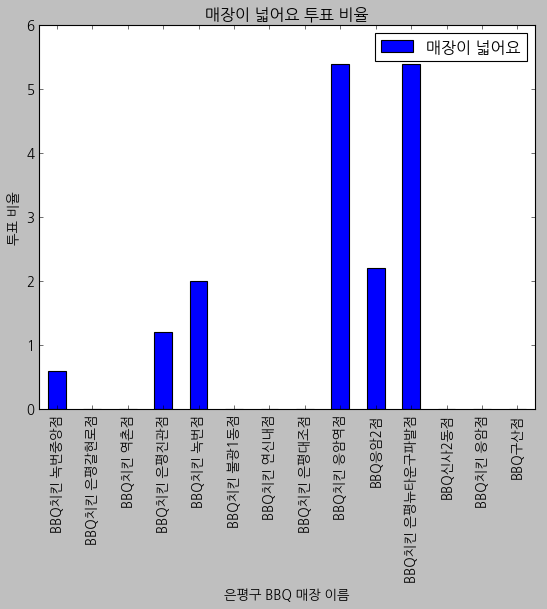

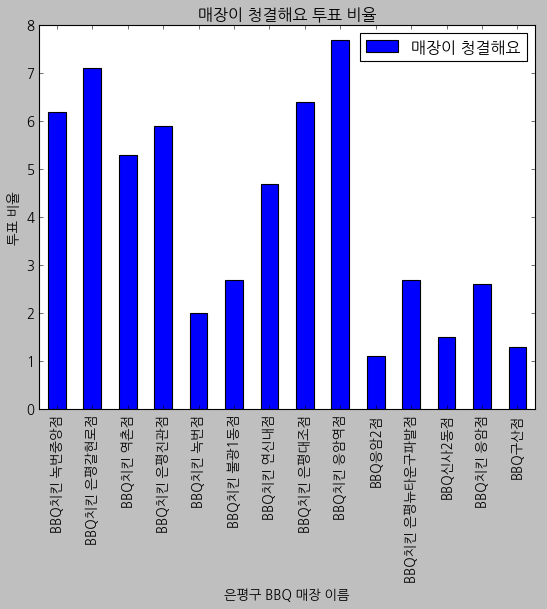

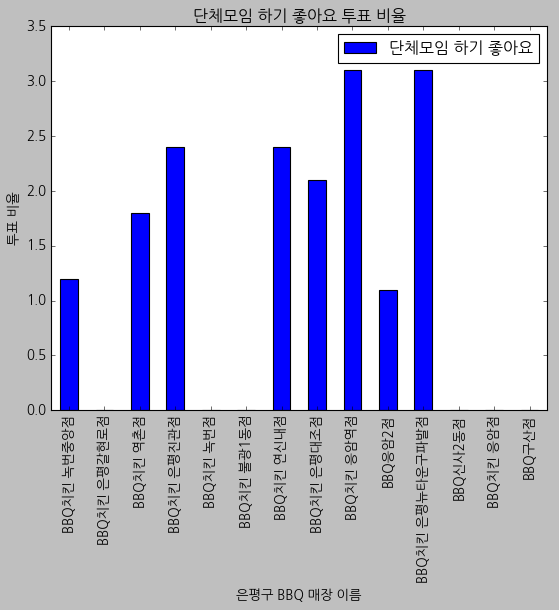

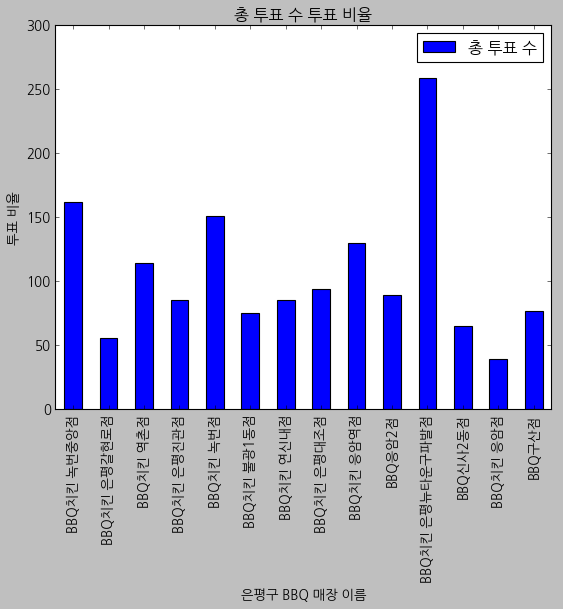

In [8]:
# 카테고리별로 각 매장의 투표 비율 bar로 만들기
def make_plot(vote):
    plt.style.use('classic')
    plt.rc('font', family='NanumGothic')
    df_kind=df[[vote]]
    df_kind.plot(kind='bar')
    plt.style.use('ggplot') 
    plt.title(f'{vote} 투표 비율')
    plt.ylabel('투표 비율')
    plt.xlabel('은평구 BBQ 매장 이름')
for column in df.columns:
    make_plot(column)